<a href="https://colab.research.google.com/github/dsluizevans/engajamentoinstagram/blob/main/Analisando_Engajamento_Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto de Análise de Enjamento Instagram

In [1]:
# Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importando base de dados
base = pd.read_excel('/content/08. Engajamento no Instagram.xlsx')

In [3]:
# Visualizando as primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [4]:
# Apagando as colunas que não irei utilizar
base.drop('Visualizações', axis=1, inplace=True)

In [5]:
# Visualizando as 5 útlimas linhas
base.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [6]:
# Analisando o tamanho da base
base.shape

(52, 9)

In [7]:
# INformação da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [8]:
# Contando os valores que aparecem na coluna Carrossel
base.Carrossel.value_counts()

S    8
Name: Carrossel, dtype: int64

In [9]:
# Filtrando valores na coluna Carrossel
base.loc[base.Carrossel.isnull(), 'Carrossel']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
6     NaN
7     NaN
9     NaN
10    NaN
11    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
22    NaN
23    NaN
24    NaN
27    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
Name: Carrossel, dtype: object

In [10]:
# Filtrando valores na coluna Carrossel tipo NaN e substituindo por 'N'
base.loc[base.Carrossel.isnull(), 'Carrossel'] = 'N'

In [11]:
# Validando a alteração
base.loc[base.Carrossel.isnull(), 'Carrossel']

Series([], Name: Carrossel, dtype: object)

In [12]:
# Vaisualizando base
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [13]:
# Descrição estatistica da base
base.describe()

,Curtidas,Comentários,Interacoes
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


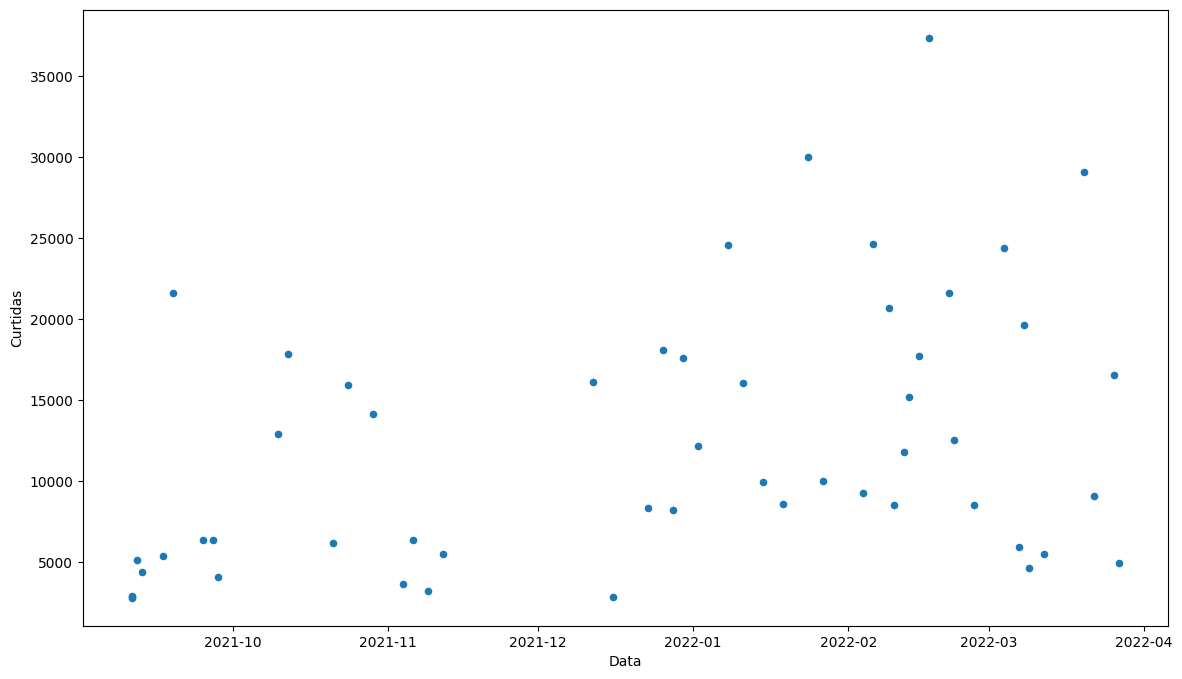

In [14]:
# Analisando as informações pelo gráfico Scatter, A data não influencia no aumento das curtidas
base.plot(kind='scatter', x='Data', y='Curtidas', figsize=(14,8));

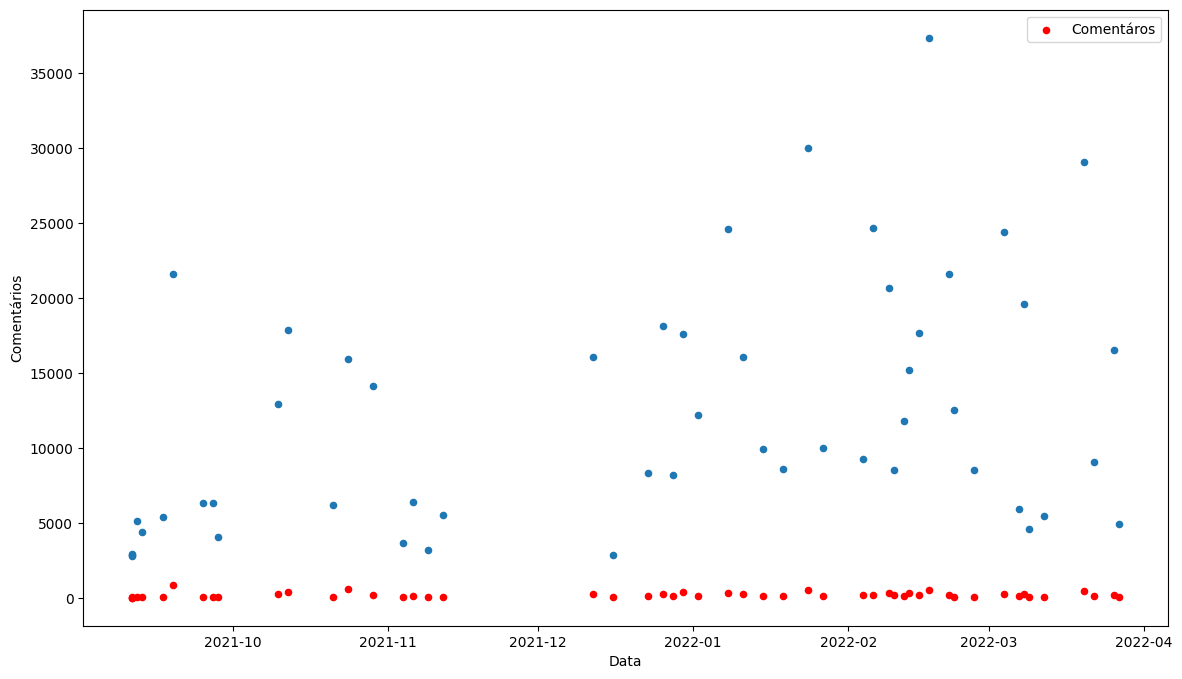

In [15]:
# Analisare curtidas e comentários no mesmo gráfico
ax = base.plot(kind='scatter', x='Data', y='Curtidas', figsize=(14,8));
base.plot(kind='scatter', x='Data', y='Comentários', color='red', label='Comentáros', figsize=(14,8), ax=ax);

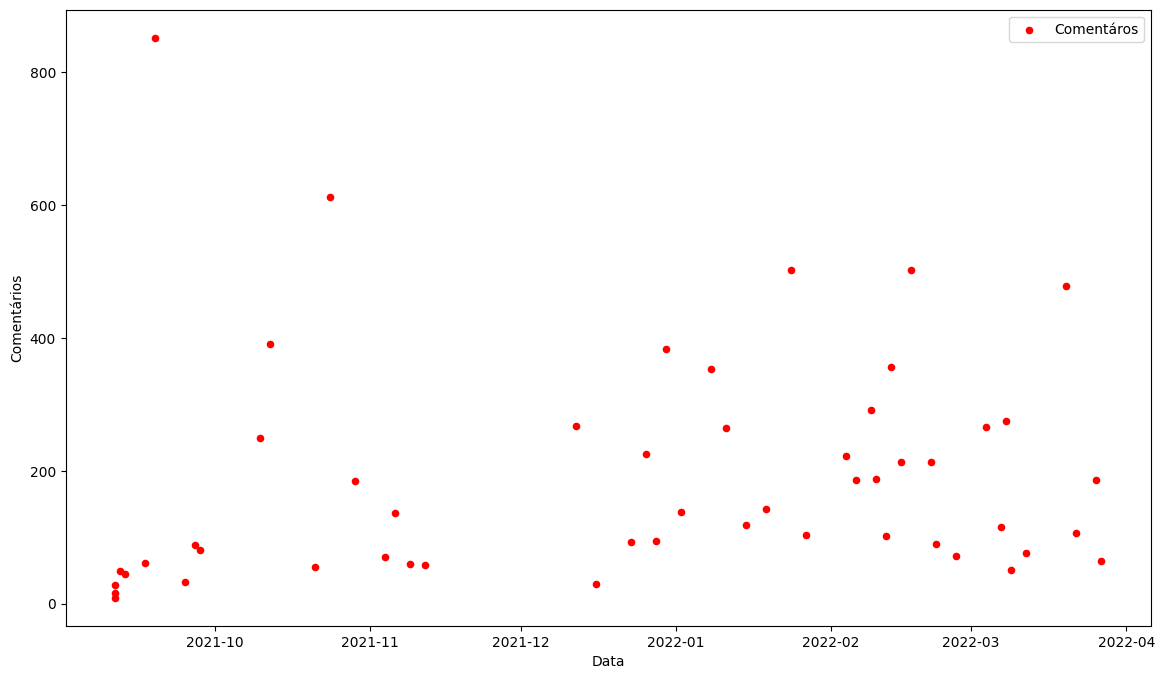

In [16]:
# Visualizando os comentarios em um gráfico separado
base.plot(kind='scatter', x='Data', y='Comentários', color='red', label='Comentáros', figsize=(14,8));

In [17]:
# Vamos ordenar os valores pelas maiores curtidas
base.sort_values(by='Curtidas', ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [18]:
# Vamos ordenar os valores pelas menores curtidas
base.sort_values(by='Curtidas', ascending=True).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


In [19]:
# Vamos agrupar as informações por tipo:
base.groupby('Tipo')['Comentários'].count()

Tipo
Foto     36
IGTV      5
Reels     5
Vídeo     6
Name: Comentários, dtype: int64

In [20]:
# Vamos agrupar as informações por tipo e pessoa
base.groupby(['Tipo', 'Pessoas'])['Comentários'].mean().sort_values(ascending=False)

Tipo   Pessoas
Vídeo  S          370.00
Reels  S          342.00
Foto   S          226.20
IGTV   S          133.60
Reels  N           98.00
Vídeo  N           65.25
Foto   N           29.50
Name: Comentários, dtype: float64

In [21]:
# Vamos agrupar as informações por curtidas e comentarios
base.groupby(['Tipo', 'Pessoas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                           
Foto  N         3863.500000        29.50
      S        15236.666667       226.20
IGTV  S         6833.400000       133.60
Reels N         5934.500000        98.00
      S        20832.000000       342.00
Vídeo N         4007.500000        65.25
      S        16409.500000       370.00

In [22]:
# Incluindo a coluna campanha
base.groupby(['Tipo', 'Pessoas', 'Campanhas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                           
Foto  N       N           2869.000000    20.500000
              S           5852.500000    47.500000
      S       N          10815.285714   159.928571
              S          19105.375000   284.187500
IGTV  S       N           6833.400000   133.600000
Reels N       N           5934.500000    98.000000
      S       N          12894.000000   249.000000
              S          24801.000000   388.500000
Vídeo N       N           4007.500000    65.250000
      S       S          16409.500000   370.000000

In [23]:
# Incluindo a coluna Pessoa
base.groupby('Pessoas')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,4256.666667,52.833333
S,14664.550000,230.500000


In [24]:
# Incluindo a coluna Campanha
base.groupby('Campanhas')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,7928.333333,123.166667
S,18173.272727,279.954545


In [25]:
# Filtrando a base
base[base.Tipo=='Foto'].groupby('Carrossel')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,13776.357143,208.571429
S,11817.875000,140.375000


In [26]:
# Filtrando a base
base.groupby('Carrossel')[['Curtidas','Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,12343.613636,198.431818
S,11817.875000,140.375000


####Mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento.

In [27]:
# Agragando por pessoas e campanhas
base.groupby(['Pessoas', 'Campanhas'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N           3937.50         53.9
        S           5852.50         47.5
S       N           9923.75        157.8
        S          19405.35        303.2

####Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo à foto

In [28]:
# Agragando por pessoas, campanhas e tipo
base.groupby(['Pessoas', 'Campanhas', 'Tipo'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                            
N       N         Foto    2869.000000    20.500000
                  Reels   5934.500000    98.000000
                  Vídeo   4007.500000    65.250000
        S         Foto    5852.500000    47.500000
S       N         Foto   10815.285714   159.928571
                  IGTV    6833.400000   133.600000
                  Reels  12894.000000   249.000000
        S         Foto   19105.375000   284.187500
                  Reels  24801.000000   388.500000
                  Vídeo  16409.500000   370.000000

####Percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo.

#### Porém vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!

In [29]:
# Filtrando base apenas pelo tipo Video
base[base.Tipo =='Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


#Conclusão:

1.   Postagens incluindo pessoas engajam muito mais que aquelas que não possuem ninguém.
2.   Postagnes em épocas de campanha também possuem um melhor melhor engajamento.

# Agora irei analisar as Tags, separando valores de uma coluna em linhas difierentes

### O que necessito descrobri é, qual tag mais engaja nessas publicações?
### Irei ignorar a coluna visualizações, e entender apenas curtidas, cometários e interações.

In [30]:
# Agrupando por tags
base.groupby('Tags')['Curtidas'].mean()

Tags
Datas comemorativas                  17975.000000
Datas comemorativas/Promoções        29084.000000
Dicas de como usar/Novos Produtos     5703.500000
Dicas de como usar/Produtos           7586.666667
Influenciadores                      15197.285714
Loja                                  2832.500000
Loja/Produtos                         2930.000000
Novos Produtos                       11619.571429
Produtos                              5666.916667
Promoções                            26645.500000
Trends                               22400.666667
Trends/Produtos                      12894.000000
Name: Curtidas, dtype: float64

In [31]:
# # Transformando a coluna Tags em uma lista de tags
base.Tags = base.Tags.str.split('/')

In [32]:
# Analisando a base
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


In [33]:
# Separand a coluna Tag em 1 linha para cada elemento da lista
base = base.explode('Tags')
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


In [34]:
# Repetindo o cálculo da média para pessoas
base.groupby('Pessoas')['Curtidas'].mean()

Pessoas
N     4154.615385
S    14100.574468
Name: Curtidas, dtype: float64

In [35]:
# Repetindo o cálculo da média para pessoas
base.groupby('Tags')['Curtidas'].mean()

Tags
Datas comemorativas    20752.250000
Dicas de como usar      6833.400000
Influenciadores        15197.285714
Loja                    2865.000000
Novos Produtos         10304.888889
Produtos                6269.823529
Promoções              27458.333333
Trends                 20024.000000
Name: Curtidas, dtype: float64

### Notamos que tags de Promoção é a que mais engaja, e que datas comemorativas e Trends também tem bom engajamento

In [48]:
# Analisando em ordem descrescente
base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values('Curtidas', ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,27458.333333,531.000000
Datas comemorativas,20752.250000,343.500000
Trends,20024.000000,352.250000
Sem Tag,15347.875000,207.750000
Influenciadores,15197.285714,161.714286
Novos Produtos,10304.888889,198.555556
Dicas de como usar,6833.400000,133.600000
Produtos,6269.823529,94.117647
Loja,2865.000000,17.666667


In [40]:
# Filtrando valores sem tags
base[base.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [41]:
# Atribuindo o texto sem tag para as colunas onde a tag é NaN
base.loc[base.Tags.isnull(), 'Tags'] = 'Sem Tag'

In [45]:
# Verificando a base
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


In [46]:
# Relacionando pessoas com Tags
base.groupby(['Pessoas', 'Tags'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Tags                                          
N       Loja                  2865.000000    17.666667
        Novos Produtos        5359.000000    62.000000
        Produtos              4450.666667    60.777778
S       Datas comemorativas  20752.250000   343.500000
        Dicas de como usar    6833.400000   133.600000
        Influenciadores      15197.285714   161.714286
        Novos Produtos       10923.125000   215.625000
        Produtos              8316.375000   131.625000
        Promoções            27458.333333   531.000000
        Sem Tag              15347.875000   207.750000
        Trends               20024.000000   352.250000

### Observa-se que onde tem pessoas a quantidade de curtidas é muito boo

In [47]:
# Ordenando por curtidas
base.groupby(['Pessoas', 'Tags'])[['Curtidas', 'Comentários']].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Pessoas Tags                                          
S       Promoções            27458.333333   531.000000
        Datas comemorativas  20752.250000   343.500000
        Trends               20024.000000   352.250000
        Sem Tag              15347.875000   207.750000
        Influenciadores      15197.285714   161.714286
        Novos Produtos       10923.125000   215.625000
        Produtos              8316.375000   131.625000
        Dicas de como usar    6833.400000   133.600000
N       Novos Produtos        5359.000000    62.000000
        Produtos              4450.666667    60.777778
        Loja                  2865.000000    17.666667

### Observa-se que campanha não é tão determinante, pois mesmo não tendo campanhas, a promoção funciona.

In [39]:
# Aplicando para campanhas e tags
base.groupby(['Campanhas', 'Tags'])[['Curtidas', 'Comentários']].mean().sort_values('Curtidas', ascending=False)

Curtidas  Comentários
Campanhas Tags                                          
S         Promoções            33217.500000   490.500000
          Trends               22400.666667   386.666667
          Datas comemorativas  20752.250000   343.500000
          Influenciadores      18715.400000   197.600000
N         Promoções            15940.000000   612.000000
          Trends               12894.000000   249.000000
S         Novos Produtos       11040.666667   323.000000
N         Novos Produtos        9937.000000   136.333333
S         Produtos              9074.000000    67.500000
N         Dicas de como usar    6833.400000   133.600000
          Influenciadores       6402.000000    72.000000
          Produtos              5895.933333    97.666667
          Loja                  2865.000000    17.666667

### Resumo da análise:

*   Publicações com rosto de pessoas é fundamental para um bom engajamento.
*   Em todas as tags que tinha pessoas, o resultado foi muito melhor.
*   Criar campanhas ajuda muito na divulgação da marca
*   Promoções tiveram um desempenho absurdamente maior que qualquer outra tag. Porém uma tag que pode ter custo para a loja, nesse caso, deve ser analisado.
*   Usar conteúdos que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outros nichos.
*   A melhor maneira de mostrar produtos é através de outras pessoas utilizando-os, e se possível em campanhas de datas especiais.
*   Para novos produtos a inclusão de pessoas é mais crítica ainda, sendo quase o dobro quando há um rosto junto ao produto.
*   Não podemos afirmar que a tag Loja é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar.
*   Continuaremos a monitorar as postagens para encontrar novos padrões, dado que ainda temos poucas informações da base.











